# <div align="center"> Exploration Numérique 2 - MAP 433

## Trinôme:
#### BARRÉ Théo
#### CHEN Longteng
#### COSTA ALVES FREIRE Bruno

## Partie Théorique
### 1. 

$S(\beta_1,\beta_2)= \langle\mathbf{X}-\mathbf{Z}\mathbf{\beta}, \mathbf{X}-\mathbf{Z}\mathbf{\beta}\rangle$, où $\mathbf{\beta}= (\beta_1,\beta_2)^T$, et 
$\mathbf{Z} = 
\begin{pmatrix}
1 & t_1 \\
1 & t_2 \\
\vdots & \vdots \\
1 & t_n 
\end{pmatrix} = \begin{pmatrix} \mathbf{1} & \mathbf{t} \end{pmatrix}$ 

Pour minimiser $S(\beta_1,\beta_2)$, on doit avoir que $\nabla{S}(\beta_1,\beta_2) = 0$, alors on a 
$$(\mathbf{X}-\mathbf{Z}\mathbf{\beta})^T\mathbf{Z} = 0 $$

C'est-à-dire que $\mathbf{Z}^T\mathbf{X}=\mathbf{Z}^T\mathbf{Z}\mathbf{\beta}$, et puisque $\det{(\mathbf{Z}^T\mathbf{Z})} = n \sum_{i=1}^n t_i^2 - \left(\sum_{i=1}^n t_i\right) = n^2 \underbrace{\left(\dfrac{||\mathbf{t}||^2}{n} - \bar{t}^2 \right)}_{s} = n^2 s > 0$, on a alors $$\mathbf{\beta}=(\mathbf{Z}^T\mathbf{Z})^{-1}\mathbf{Z}^T\mathbf{X},$$ 
ce qui s'agit bien du minimum de $S$, car
$$\nabla^2{S}(\beta) = \mathbf{Z}^T\mathbf{Z}$$
est bien une matrice positive définie (réelle, symétrique, avec $\text{Tr}{(\mathbf{Z}^T \mathbf{Z})} = n + ||\mathbf{t}||^2 > 0$ et $\det{(\mathbf{Z}^T\mathbf{Z})} > 0$). 

Ainsi, $$\boxed{\hat{\beta}_2=\dfrac{\sum\limits_{i=1}^n(t_i-\bar{t})X_i}{\sum\limits_{i=1}^n(t_i-\bar{t})^2}}, \boxed{\hat{\beta}_1=\bar{X}-\hat{\beta}_2\bar{t}}$$

### 2.

On a: $ \frac{\hat{\beta}_j-\beta_j}{\hat{\sigma}_j}$ suit une loi de Student à $(n - 2)$ degrés de liberté

Donc:  $$ \mathbb{P_\theta}\left[\left|\dfrac{\hat{\beta}_j-\beta_j}{\hat{\sigma}_j} \right| \leq t_{n-2} \left(1- \dfrac{\alpha}{2}\right)\right] = 1 - \alpha $$
donc:   $$ \mathbb{P_\theta}\left[-t_{n-2} \left(1 - \dfrac{\alpha}{2}\right) \leq \dfrac{\hat{\beta}_j-\beta_j}{\hat{\sigma}_j} \leq t_{n-2} \left(1- \dfrac{\alpha}{2}\right)\right] = 1 - \alpha $$ 
et comme: $\hat{\sigma}_j \geq 0 $, on a:  $$\boxed{ \mathbb{P_\theta}\left[\beta_j \in \left[\hat{\beta}_j - t_{n-2} \left(1 - \dfrac{\alpha}{2}\right)\hat{\sigma}_j, \hat{\beta}_j + t_{n-2} \left(1 - \dfrac{\alpha}{2}\right)\hat{\sigma}_j\right]\right] = 1 - \alpha }$$
D'où le résultat.  

On peut dire que si les données suivent une loi appartenant au modèle statistique choisi, alors  $ \left[\hat{\beta}_j - t_{n-2} \left(1 - \dfrac{\alpha}{2}\right)\hat{\sigma}_j, \hat{\beta}_j + t_{n-2} \left(1 - \dfrac{\alpha}{2}\right)\hat{\sigma}_j\right]$ est un intervalle de confiance pour $\beta_j$ au niveau $1-\alpha$.

### Formules:

\begin{equation}
\hat{\beta}_2 = \dfrac{\sum_{i=1}^n (t_i - \bar{t}) X_i}{\sum_{i=1}^n (t_i - \bar{t})^2}, \text{ et } \hat{\beta}_1 = \bar{X} - \hat{\beta}_2 \bar{t}
\end{equation}


$\hat{X}_i = \hat{\beta}_1 + \hat{\beta}_2 t_i$, $\hat{\varepsilon}_i = X_i - \hat{X}_i$, et puis

\begin{equation}
\hat{\sigma}^2 = \dfrac{1}{n-2} \sum\limits_{i=1}^{n} \hat{\varepsilon}_i^2
\end{equation}

* $\dfrac{(n-2)}{\sigma^2} \hat{\sigma}^2 \sim \chi^2(n-2)$
* $\dfrac{\hat{\beta}_j - \beta_j}{\hat{\sigma}_j} \sim \mathcal{T}_n(0)$ (loi de Student centrée, à $n-2$ degrés de liberté)

Avec $\hat{\sigma}_1^2 = \hat{\sigma}^2 \left(\dfrac{\sum_{i=1}^n t_i^2}{n \sum_{i=1}^n (t_i - \bar{t})^2} \right)$, et $\hat{\sigma}_2^2 = \dfrac{\hat{\sigma}^2}{\sum_{i=1}^n (t_i - \bar{t})^2} $

## Applications Numériques

### 3. Visualiser les données d’anomalies de températures sur la période 1880-2020

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from IPython.display import display, Latex

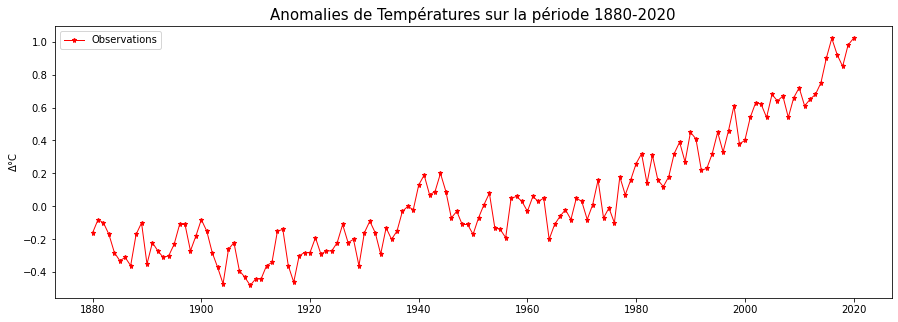

In [2]:
file = "GLB.Ts+dSST.csv"
données = pd.read_csv(file, na_values="***", delimiter=',')

X_series = données["J-D"]
t_series = données["Year"]


plt.figure(figsize=(15,5))
plt.title(f"Anomalies de Températures sur la période 1880-2020", fontsize=15)

plt.plot(t_series, X_series, 'r*-', linewidth=1, markersize=5)
#plt.hlines(y=0, xmin=t_series[0], xmax=t_series[len(t_series)-1])
plt.legend(["Observations"])
#plt.legend(["Observations", "Ligne Base"])
plt.ylabel("$\Delta$°C")
plt.show()

### 4. Estimer les paramètres du modèle linéaire en utilisant les données d'anomalies sur des intervalles de temps de 30 ans

In [3]:
int_temps = 30
ecart = 10

n_periodes = (t_series.size - int_temps + ecart)//ecart


n = int_temps+1
β_1_hat, β_2_hat, X_hat = {}, {}, {}
σ2_hat, σ2_1_hat, σ2_2_hat = {}, {}, {}

for i in range(n_periodes):
    X = X_series[i*ecart:i*ecart+n]
    t = t_series[i*ecart:i*ecart+n]
    label = f"{t.iloc[0]}-{t.iloc[-1]}"
    
    β_2_hat[label] = ((t-t.mean())*X).sum()/((t-t.mean())**2).sum()
    
    β_1_hat[label] = X.mean() - β_2_hat[label]*t.mean()
    
    X_hat[label] = β_1_hat[label] + β_2_hat[label]*t
    
    σ2_hat[label] = ((X - X_hat[label])**2).sum()/(n-2)
    
    σ2_1_hat[label] = σ2_hat[label] * (t**2).mean()/((t-t.mean())**2).sum()
    
    σ2_2_hat[label] = σ2_hat[label] / ((t-t.mean())**2).sum()
    
    print("Pour la période "+label+":")
    display(Latex(f'$\\hat{{\\beta}}_1 = {β_1_hat[label]:.6f}$'))
    display(Latex(f'$\\hat{{\\beta}}_2 = {β_2_hat[label]:3.6f}$'))
    display(Latex(f'$\\hat{{\\sigma}}^2 = {σ2_hat[label]:.6f}$'))
    print("__________________________")
    

Pour la période 1880-1910:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1890-1920:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1900-1930:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1910-1940:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1920-1950:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1930-1960:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1940-1970:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1950-1980:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1960-1990:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1970-2000:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1980-2010:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________
Pour la période 1990-2020:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

__________________________


### 5. Visualiser en superposition du graphe des observations les différentes droites de régression $\hat{X}_i = \hat{\beta}_1 + \hat{\beta}_2 t_i$

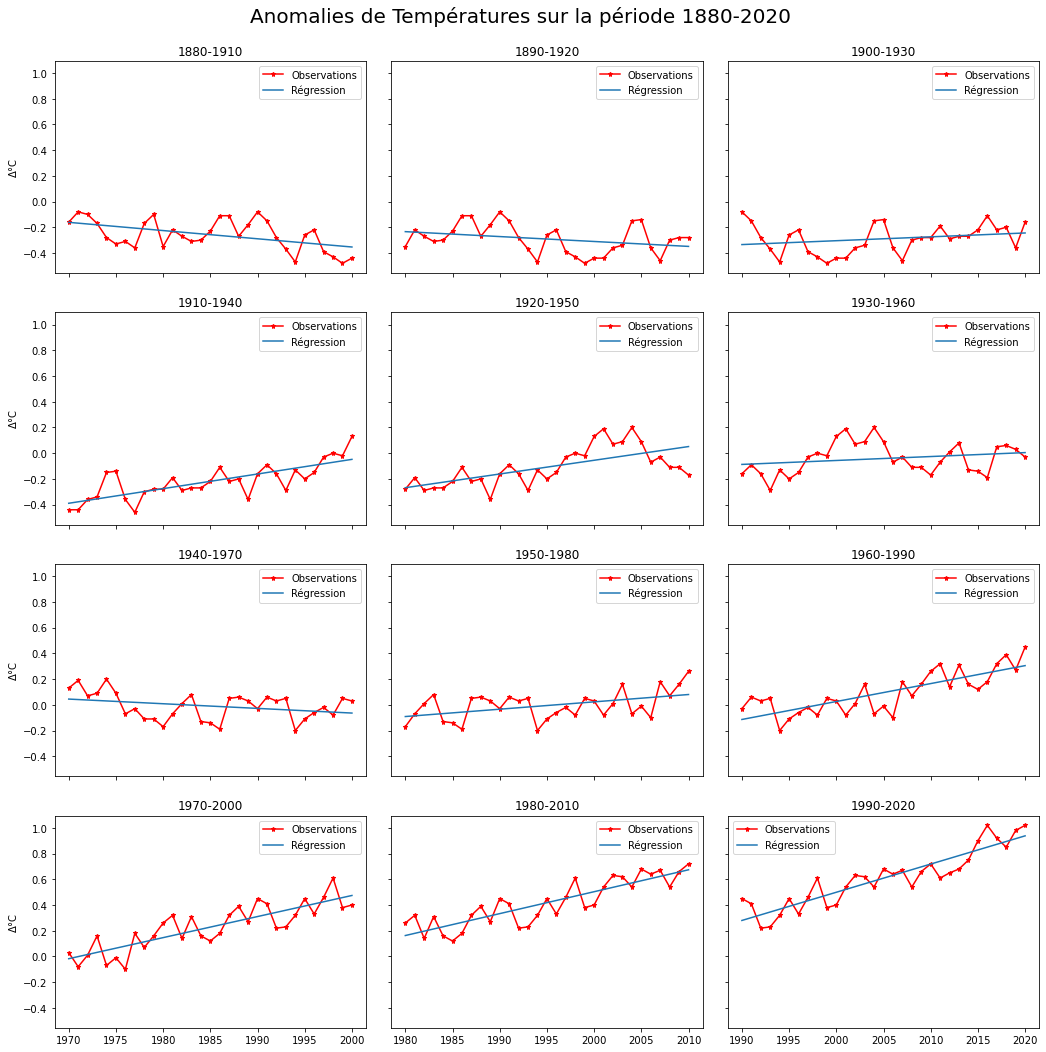

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,15), sharey=True)

for i, ax in enumerate(axs.ravel()):    
    label = list(X_hat.keys())[i]
    X, t = X_series[i*ecart:i*ecart+n], t_series[i*ecart:i*ecart+n]
    
    ax.title.set_text(label)
    
    ax.plot(t, X, 'r*-', linewidth=1.5, markersize=5)
    ax.plot(t, β_1_hat[label] + β_2_hat[label]*t, '-', linewidth=1.5)
    #ax.hlines(xmin = t.iloc[0], xmax = t.iloc[-1], y = 0, linewidth=1, linestyle='--', color='g')
    
    #ax.legend(['Observations', 'Régression', 'Ligne Base'])
    ax.legend(['Observations', 'Régression'])
    
    ax.set(ylabel="$\Delta$°C")
    ax.label_outer()
    
plt.suptitle(f"Anomalies de Températures sur la période 1880-2020", fontsize=20)
plt.tight_layout(pad=2)
plt.show()

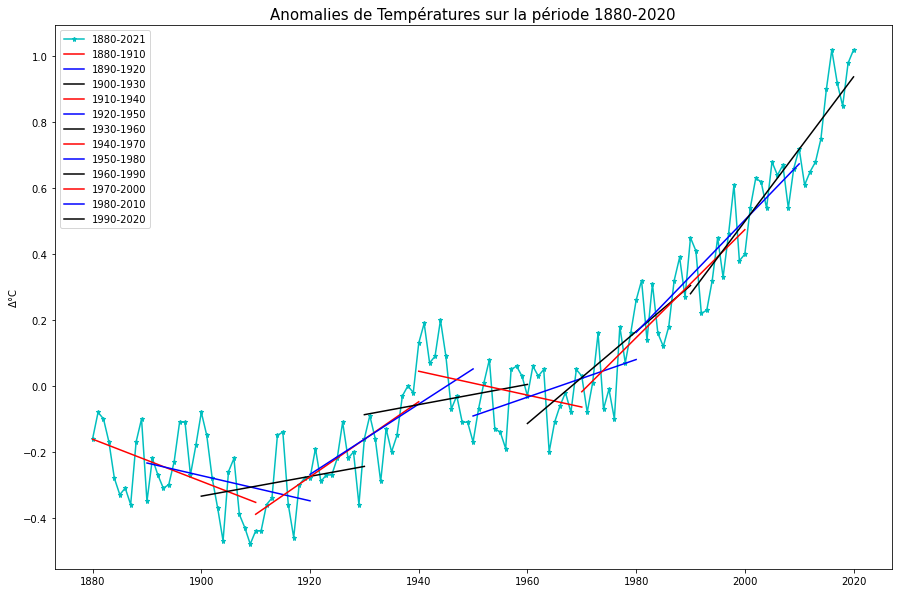

In [5]:
plt.figure(figsize=(15,10))


plt.title(f"Anomalies de Températures sur la période 1880-2020", fontsize=15)
plt.plot(t_series, X_series, 'c*-', linewidth=1.5, markersize=5)

schema_couleurs = ['red', 'blue', 'black']
for i in range(n_periodes):
    label = list(X_hat.keys())[i]
    t = t_series[i*ecart:i*ecart+n]
    plt.plot(t, β_1_hat[label] + β_2_hat[label]*t, linewidth=1.5, 
             color = schema_couleurs[i % len(schema_couleurs)])

plt.legend(["1880-2021"]+[label for label in X_hat.keys()])
plt.ylabel("$\Delta$°C")
plt.show()

### 6. Visualiser les valeurs de $\left[\hat{\beta}_j - t_{n-2}(1-\alpha/2) \hat{\sigma}_j, \hat{\beta}_j + t_{n-2}(1-\alpha/2) \hat{\sigma}_j \right]$ pour les différents intervalles de temps

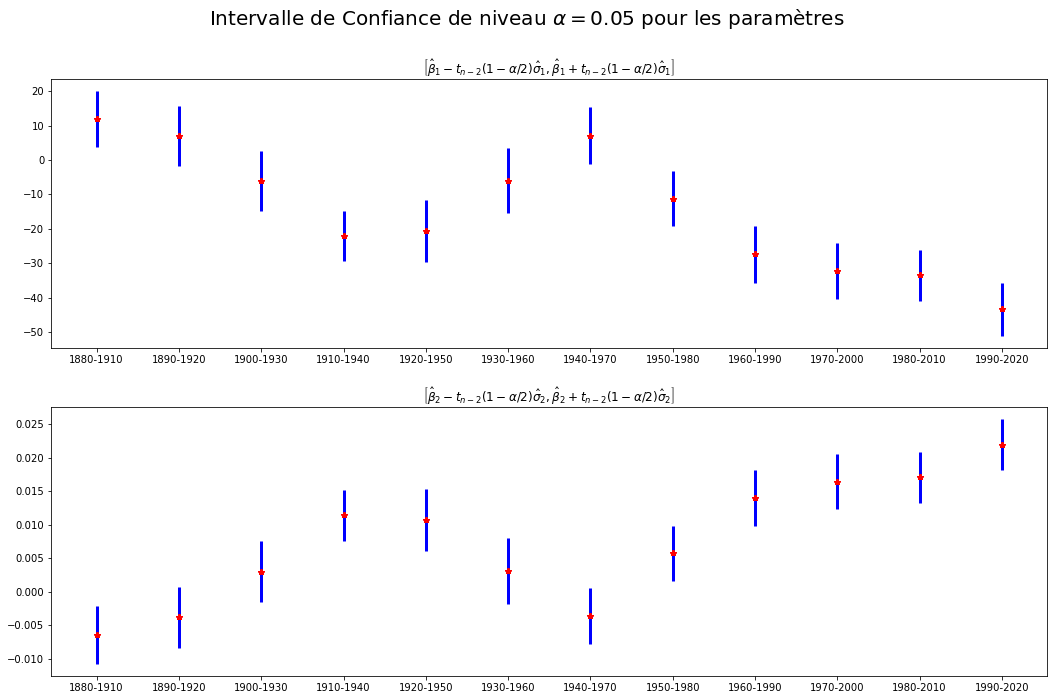

In [6]:
#β α σ
α = 0.05

interv1, interv2 = {}, {}
for label in X_hat.keys():
    interv1[label] = β_1_hat[label] + np.sqrt(σ2_1_hat[label]) * sps.t(df=n-2).ppf((α/2, 1-α/2))
    interv2[label] = β_2_hat[label] + np.sqrt(σ2_2_hat[label]) * sps.t(df=n-2).ppf((α/2, 1-α/2))
    

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharey=False)

ax1.title.set_text(r"$\left[\hat{\beta}_1 - t_{n-2}(1-\alpha/2) \hat{\sigma}_1, "+
                   r"\hat{\beta}_1 + t_{n-2}(1-\alpha/2) \hat{\sigma}_1 \right]$")
ax2.title.set_text(r"$\left[\hat{\beta}_2 - t_{n-2}(1-\alpha/2) \hat{\sigma}_2, "+
                   r"\hat{\beta}_2 + t_{n-2}(1-\alpha/2) \hat{\sigma}_2 \right]$")
for label in X_hat.keys():
    ax1.plot([label for label in X_hat.keys()], [interv1[label].mean() for label in X_hat.keys()], 'r*')
    ax1.vlines(ymin = interv1[label][0], ymax = interv1[label][1], x = label, 
               linewidth=3, linestyle='-', color='b')
    
    ax2.plot([label for label in X_hat.keys()], [interv2[label].mean() for label in X_hat.keys()], 'r*')
    ax2.vlines(ymin = interv2[label][0], ymax = interv2[label][1], x = label, 
               linewidth=3, linestyle='-', color='b')
    
    
plt.suptitle(r"Intervalle de Confiance de niveau $\alpha = $"+f"{α} pour les paramètres", fontsize=20)
plt.tight_layout(pad=2)
plt.show()

### 7. Conclusion



Les graphiques de la question 5 nous montrent que la régression linéaire reproduit relativement bien la courbe des anomalies de températures sur chaque période de 30 ans. Les valeurs observées des anomalies semblent bien réparties autour de cette moyenne de manière gaussienne. On peut donc conclure que les anomalies de températures suivent sur chaque période de 30 ans une loi normale de moyenne affine. En revanche, les valeurs de $\hat{\beta}_1$ et $\hat{\beta}_2$ et leurs intervalles de confiance évoluent beaucoup entre deux intervalles de temps consécutifs, ce qui rend le modèle gaussien à moyenne linéaire peu pertinent sur de grandes périodes temporelles. Notamment, un unique couple ($\hat{\beta}_1$, $\hat{\beta}_2$) ne suffirait pas à modéliser l'évolution des anomalies sur les 140 années d'étude.